<a href="https://colab.research.google.com/github/vladgap/Various/blob/main/SVR_function_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt
import skimage.io as sio

In [2]:
from sklearn.svm import SVR

# 1

In [3]:
def func(x):
    y = x**2+1
    return y

In [4]:
x=np.linspace(-1,2,16)
data1=np.array([
               x,
               func(x)
               ]).T
X1=data1[:,[0]]
T1=data1[:,[1]]

In [5]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

scaler_X1.mean_, scaler_X1.scale_ = 0, 1 # disable scaling
scaler_T1.mean_, scaler_T1.scale_ = 0, 1 # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   0 1
scaler T -- mean, stdev:   0 1


array([[-1. ],
       [-0.8],
       [-0.6]])

In [6]:
# T_sc1.ravel()

In [7]:
# T_sc1.ravel().reshape(-1,1)

## 1_1

In [8]:
svr1=SVR(kernel='rbf', gamma=10)
svr1.fit(X_sc1,T_sc1.ravel())
predics1=scaler_T1.inverse_transform(svr1.predict(X_sc1).reshape(-1,1))
# predics1

In [9]:
# @title
errors1=(predics1-T1)/T1*100
# plt.hist(errors1[:,0]) # division by 0

In [10]:
# @title
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=T1[:,0], y=predics1[:,0], mode='markers', marker_size=4, name='predics', marker_color='black'),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=T1[:,0], mode='lines', line_color='red', line_width=0.2, showlegend=False),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=errors1[:,0], mode='markers', marker_size=4, name='errors', marker_color='orange'),secondary_y=True)

fig.update_xaxes(title_text="data")

# Set y-axes titles
fig.update_yaxes(title_text="predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [11]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1.predict(scaler_X1.transform(X_extended.reshape(51,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

## 1_2

In [12]:
svr1_2=SVR(kernel='poly',degree=2,coef0=1)
svr1_2.fit(X_sc1,T_sc1.ravel())
predics1_2=scaler_T1.inverse_transform(svr1_2.predict(X_sc1).reshape(-1,1))
# predics1_2

In [13]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
# fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1_2.predict(scaler_X1.transform(X_extended.reshape(-1,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1_2[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [14]:
svr_temp=svr1_2
print (' Dual coefficients:\n',svr_temp.dual_coef_,'\n',
       'Support vectors:\n',svr_temp.support_vectors_,'\n',
       'Coef0: ',svr_temp.coef0,'\n',
       'Intercept: ',svr_temp.intercept_[0],)

 Dual coefficients:
 [[ 0.12260026 -0.08985684 -0.18704024  0.15429682]] 
 Support vectors:
 [[-1. ]
 [ 0.4]
 [ 0.6]
 [ 2. ]] 
 Coef0:  1 
 Intercept:  1.078550300767707


In [15]:
scaler_T1.inverse_transform(svr1_2.predict([[1]]).reshape(-1,1))

array([[2.07838565]])

# 2

In [16]:
data2=[
[0.32,	0.99,	0.77,	0.69,	0.04,	0.37,	0.25,	0.44,	0.42,	0.64,	0.8,],
[0.4,	0.23,	0.22,	0.57,	0.78,	0.69,	0.2,	0.45,	0.17,	0.98,	0.96,],
[4.952768,	5.924299,	5.412533,	5.214509,	4.844064,	4.912653,	4.975625,	4.995184,	5.040088,	5.066144,	5.32,],
]
data2=np.array(data2).T
X2=data2[:,[0,1]]
T2=data2[:,[2]]

In [17]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

scaler_X2.mean_, scaler_X2.scale_ = 0, 1 # disable scaling
scaler_T2.mean_, scaler_T2.scale_ = 0, 1 # disable scaling

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   0 1
scaler T -- mean, stdev:   0 1


array([[0.32, 0.4 ],
       [0.99, 0.23],
       [0.77, 0.22]])

In [96]:
# svr2=SVR(kernel='rbf', gamma=.1)
# svr2=SVR(kernel='sigmoid')
svr2=SVR(kernel='poly', degree=2, coef0=1, gamma=1)
svr2.fit(X_sc2,T_sc2.ravel())
predics2=scaler_T2.inverse_transform(svr2.predict(X_sc2).reshape(-1,1))
# predics2

In [97]:
svr2.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 1,
 'degree': 2,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [98]:
x_mesh, y_mesh = np.linspace(-1, 2, 31), np.linspace(-1, 2, 31)
# x_mesh, y_mesh = np.arange(-1, 2, 0.1), np.arange(-1, 2, 0.1)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh = x_mesh.flatten().reshape(31*31,1)
y_mesh = y_mesh.flatten().reshape(31*31,1)
mesh2=np.concatenate((x_mesh, y_mesh), axis=1)
# x_mesh[:5]
mesh_predics2=scaler_T2.inverse_transform(svr2.predict(scaler_X2.transform(mesh2)).reshape(-1,1))

In [99]:
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=data2[:,2], mode='markers', name='data'))
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=predics2[:,0], mode='markers', name='predics'))
fig.add_trace(go.Scatter3d(x=x_mesh[:,0], y=y_mesh[:,0], z=mesh_predics2[:,0], mode='markers', marker_size=2, name='mesh-predics'))
x=np.linspace(0, 1, 11)
y=np.linspace(0, 1, 11)
x, y = np.meshgrid(x,y)
z=x**3-.2*y+5
fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=0, opacity=0.5, showlegend=True, name='data surface'))
fig.update_scenes(camera_projection_type="orthographic")

fig.show()

In [100]:
svr_temp=svr2
print (' Dual coefficients:\n',svr_temp.dual_coef_,'\n',
       'Support vectors:\n',svr_temp.support_vectors_,'\n',
       'coef0: ',svr_temp.coef0,'\n',
       'gamma: ',svr_temp.gamma,'\n',
       'Intercept: ',svr_temp.intercept_[0],)

 Dual coefficients:
 [[ 1.         -0.16088724 -0.63712613  0.21303446 -0.41502109]] 
 Support vectors:
 [[0.99 0.23]
 [0.77 0.22]
 [0.69 0.57]
 [0.04 0.78]
 [0.42 0.17]] 
 coef0:  1 
 gamma:  1 
 Intercept:  4.867958866698583


## manual test1

In [101]:
regressor=svr2

# Extract the parameters
support_vectors = regressor.support_vectors_
coefficients = regressor.dual_coef_
intercept = regressor.intercept_
gamma = regressor.gamma

# Polynomial kernel function
def polynomial_kernel(x, y, degree=2, r=1, gamma=1):
    return (gamma * np.dot(x, y) + r) ** degree

# Predict manually (example for one instance x)
x = [0.37,0.69]  # replace this with your instance
manual_y_pred = np.sum(coefficients.ravel() * np.array([polynomial_kernel(x, sv, 2, 1, gamma) for sv in support_vectors])) + intercept
manual_y_pred

array([4.97142346])

In [102]:
svr2.predict([x])

array([4.97142346])

## manual test2

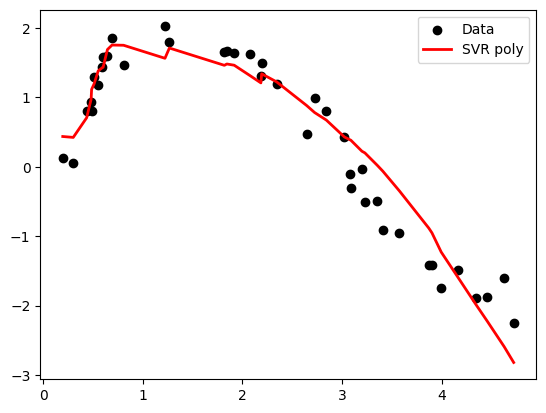

In [72]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 2), axis=0)
y = np.sin(X).sum(axis=1) + np.random.randn(40) * 0.2

# Define SVR model
svr_poly = SVR(kernel='poly',coef0=1, degree=2, gamma=1)

# Fit model
svr_poly.fit(X, y)

# Predict on sample data
y_pred = svr_poly.predict(X)

# Plot results
plt.scatter(X[:,1], y, color='black', label='Data')
plt.plot(X[:,1], y_pred, color='red', linewidth=2, label='SVR poly')
plt.legend()
plt.show()

In [105]:
# Extract model parameters
support_vectors = svr_poly.support_vectors_
dual_coefs = svr_poly.dual_coef_
intercept = svr_poly.intercept_
gamma = svr_poly.gamma

# Make manual prediction
def manual_predict(x):
    y_pred = 0
    for i in range(len(support_vectors)):
        kernel_value = polynomial_kernel(x, support_vectors[i], degree=2, gamma=gamma)
        y_pred += dual_coefs[0][i] * kernel_value
    y_pred += intercept
    return y_pred

# Polynomial kernel function
def polynomial_kernel(x, y, degree=2, gamma=1):
    return (gamma*np.dot(x, y.T) + 1) ** degree

# Make prediction on new data point
x_new = [2.5, 3.0]
y_new = manual_predict(x_new)
print(y_new)

[0.29505739]


In [74]:
svr_poly.predict([x_new])

array([0.29505739])